## Create LIF neurons in a balanced (fluctuation driven) regime

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

#%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rand
from sklearn.kernel_ridge import KernelRidge
from sklearn import linear_model
from pandas.plotting import autocorrelation_plot as autocorr
import pandas as pd

from lib.lif import LIF, ParamsLIF, LSM, ParamsLSM
from lib.causal import causaleffect, causaleffect_linear

Populating the interactive namespace from numpy and matplotlib


In [2]:
sigma = 10
mu = 1
tau = 1
params = ParamsLIF(sigma = sigma, mu = mu, tau = tau)
t = 500
lif = LIF(params, t = t)

In [31]:
#Simulate for 500s, plot ISI distribution for a set of weights
mm = 10
wvals = np.linspace(2, 20, mm)
spiketimes = {}

for idx, w in enumerate(wvals):
    print("wval: %f"%w)
    lif.W[0] = w
    (v, h, _, _) = lif.simulate()
    times = np.nonzero(h[0,:])
    spiketimes[idx] = np.diff(times[0])

wval: 2.000000
wval: 4.000000
wval: 6.000000
wval: 8.000000
wval: 10.000000
wval: 12.000000
wval: 14.000000
wval: 16.000000
wval: 18.000000
wval: 20.000000


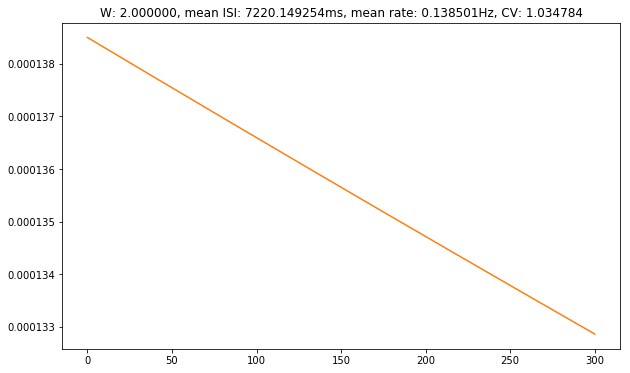

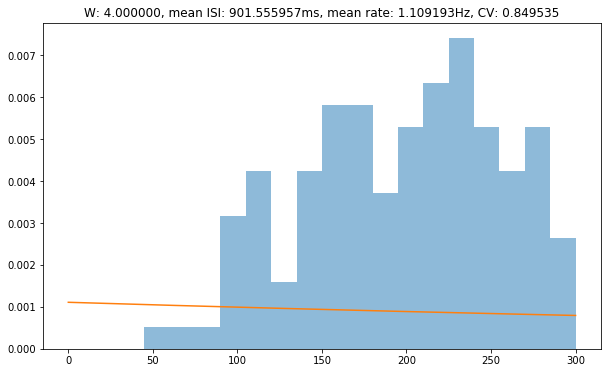

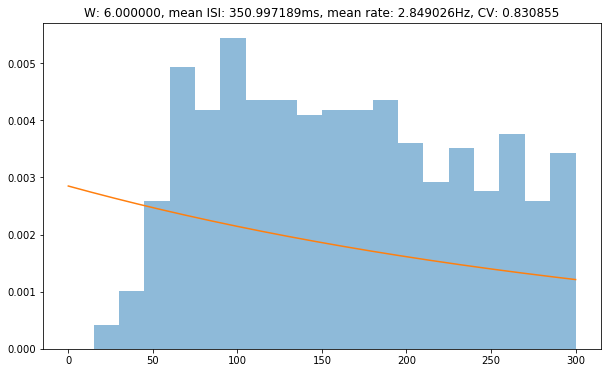

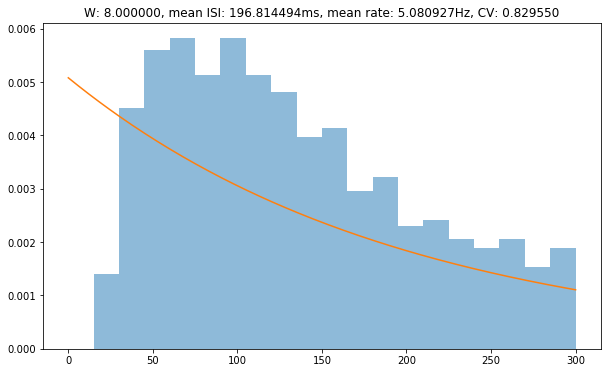

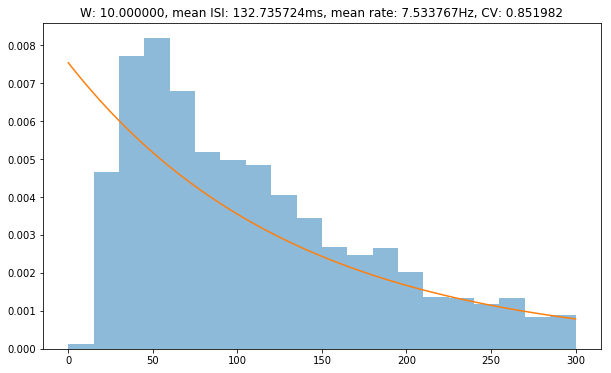

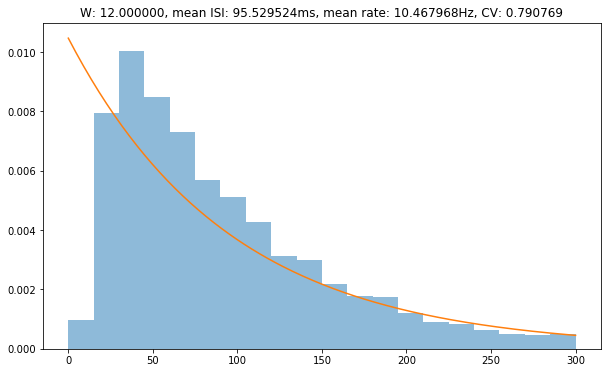

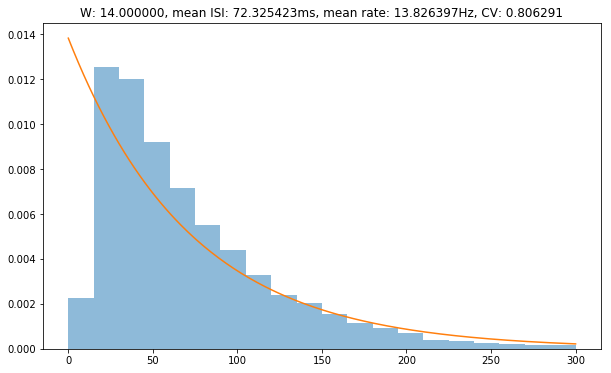

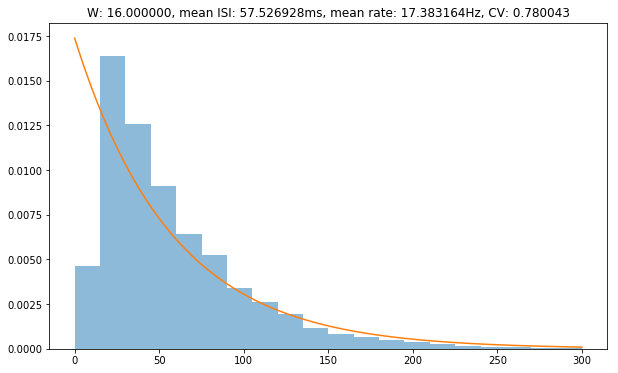

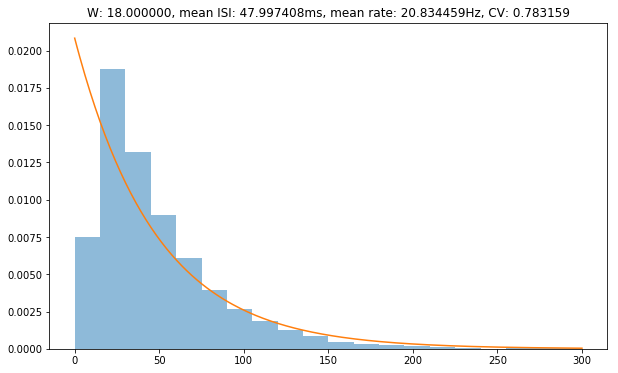

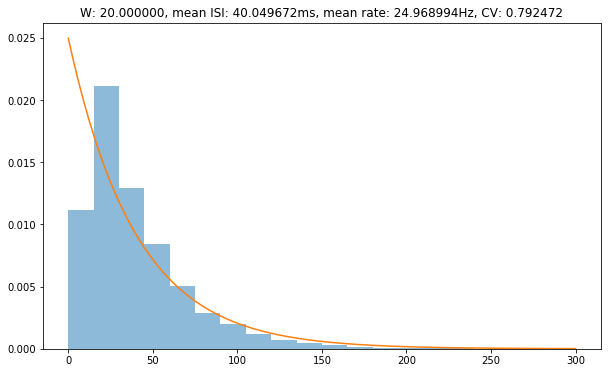

In [32]:
tmax = 300
tt = np.linspace(0, tmax, 200)
for idx in range(len(wvals)):
    fig,ax = plt.subplots(1,1)
    ax.hist(spiketimes[idx], 20, normed=1, alpha=0.5, range = (0, tmax));
    meanrate = np.mean(spiketimes[idx])
    stdrate = np.std(spiketimes[idx])
    ax.plot(tt, np.exp(-tt/meanrate)/meanrate)
    ax.set_title('W: %f, mean ISI: %fms, mean rate: %fHz, CV: %f'%(wvals[idx], meanrate, 1000/meanrate,stdrate/meanrate))

## Make plot of voltage trace, check it has a random walk like quality

In [8]:
lif.W[0] = 10
lif.params.c = 0.9
(v, h, _, _) = lif.simulate()
#Mean rate here is 7Hz. Suggests we take a DeltaT of 70ms

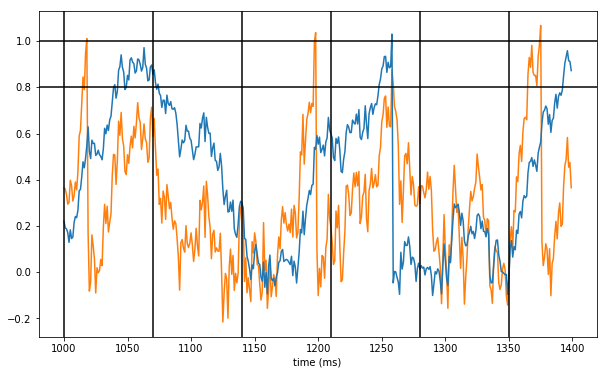

In [11]:
tmin = 1000
tmax = tmin+400
plt.plot(range(tmin, tmax), v[0,tmin:tmax], 'C1')
plt.plot(range(tmin, tmax), v[1,tmin:tmax], 'C0')
for t in range(tmin, tmax, 70):
    plt.axvline(x=t, color=(0,0,0))
plt.axhline(y=0.8, color=(0,0,0))
plt.axhline(y=1.0, color=(0,0,0))
plt.xlabel('time (ms)')
plt.savefig('./fig_1d.pdf')